<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r12-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [ ]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-1-r12.csv?token=AKVFSOHA22D43W4EI7X4NYC63JFGI')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-11-r12.csv?token=AKVFSODJ2VS24KRBYQIJD3S63JFGM')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-1-r12.csv?token=AKVFSOBVDHVVHZZXH3RCL7C63JFGQ')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-11-r12.csv?token=AKVFSOHJCYPW5Z6JE6QH7Y263JFGU')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-1-r12.csv?token=AKVFSOCMNOH254MXRFKBFLC63JFG2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-11-r12.csv?token=AKVFSOBTW3GOYMTQWREAEZS63JFHA')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-1-r12.csv?token=AKVFSOG2AAMPBBWFFB7QZUK63JFHG')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-11-r12.csv?token=AKVFSOGMVUN2GSRNBP7L43C63JFHK')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-15-r12.csv?token=AKVFSOG7434YOYMQFHD2A6S63JFHQ')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-4-r12.csv?token=AKVFSOETJZRKT5LD2DKFWHC63JFHU')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-6-r12.csv?token=AKVFSOCZK2XNNVLCGIL33J263JFHY')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-9-r12.csv?token=AKVFSOBVUUWDIUCAEEVQAMS63JFH4')

In [22]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(17909, 26)
(17909, 26)
(13602, 26)
(13602, 26)
(12725, 26)
(12725, 26)
(12725, 26)
(12725, 26)
(13953, 26)
(9592, 26)
(8757, 26)
(8757, 26)


In [ ]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r12-train.csv',index=False)

In [24]:
df = pd.read_csv('fft-r12-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,96,3,2,1,1,4,3,9,15,15,24,8,4,4,3,0.75,16,1,1,1,1,6,16,3,27,0
1,96,3,2,1,1,4,3,9,15,15,24,8,3,4,3,0.75,16,1,1,1,1,6,12,3,27,1
2,114,3,2,1,1,4,3,9,15,15,24,8,5,4,3,0.75,16,1,1,1,1,6,20,3,27,0
3,1117,0,3,1,1,4,3,9,6,6,28,12,24,4,4,1.00,20,6,1,6,6,0,96,3,27,1
4,1125,2,0,2,1,4,3,9,28,12,27,11,24,4,0,0.00,4,5,2,6,10,0,192,6,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154976,3275216,2,0,6,4,2,3,10,28,12,27,11,30077,4,0,0.00,25,5,10,14,50,0,1443696,18,180,0
154977,3275223,2,0,6,5,3,3,10,28,12,27,11,30077,4,0,0.00,32,4,11,14,44,0,2706930,18,180,0
154978,3275224,2,0,2,1,4,3,11,28,12,27,11,30078,4,0,0.00,32,3,12,14,36,0,240624,6,66,0
154979,3275225,2,0,7,1,4,3,12,28,12,15,15,30077,3,0,0.00,5,2,13,14,26,0,842156,21,252,0


In [25]:
df.shape

(154981, 26)

Test Data

In [ ]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-12-r12.csv?token=AKVFSOAQGBVPWTBK23STAH263JFYI')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-7-r12.csv?token=AKVFSOACXGKWQCFQJMZE7OK63JFYM')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-12-r12.csv?token=AKVFSOEP6PXCYIEXXGXIMAS63JFYS')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-7-r12.csv?token=AKVFSOEPFPRE6YMP5OPPTWC63JFYW')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-12-r12.csv?token=AKVFSOE34UMVNGJ6LETMSXC63JFY2')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-7-r12.csv?token=AKVFSODWIH76NTQVZ2HRY7263JFY6')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-12-r12.csv?token=AKVFSOHIESF6HVPVT7QHJYK63JFZG')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-7-r12.csv?token=AKVFSOEYEBJJAOXQMTBOKYC63JFZM')

In [27]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(78027, 26)
(17909, 26)
(73474, 26)
(13602, 26)
(72609, 26)
(12725, 26)
(72609, 26)
(12725, 26)


In [28]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,1129,0,3,1,1,4,3,9,6,6,28,12,36,4,4,1.00,20,9,1,9,9,0,144,3,27,0
1,1137,2,0,2,1,4,3,9,28,12,27,11,36,4,0,0.00,4,8,2,9,16,0,288,6,54,0
2,1202,0,3,1,1,4,3,9,1,1,28,12,38,5,5,1.00,20,7,3,9,21,0,152,3,27,0
3,1206,0,3,3,1,4,3,10,27,11,28,12,36,4,4,1.00,20,6,4,9,24,0,432,9,90,0
4,1210,2,0,2,1,4,3,10,28,12,27,11,38,4,0,0.00,4,5,5,9,25,0,304,6,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,3264595,2,0,2,1,4,3,11,28,12,27,11,30072,4,0,0.00,32,3,12,14,36,0,240576,6,66,0
12721,3264596,3,0,7,1,4,3,12,28,12,0,0,30071,3,0,0.00,6,2,13,14,26,0,841988,21,252,0
12722,3264676,0,3,3,1,4,3,9,27,11,28,12,30072,4,4,1.00,20,1,14,14,14,0,360864,9,81,0
12723,3265178,3,2,7,1,4,3,9,29,13,0,0,30077,4,1,0.25,10,2,1,2,2,6,842156,21,189,0


Processing

In [29]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [ ]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [31]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.653830,0.411256,-0.101732,0.140459,NaN,0.283931,-0.046166,0.515768,-0.565324,-0.747082,-0.388350,-0.317708,0.108868,-0.164069,-0.081240,0.628902,0.044902,0.411256,0.451396,0.050154
inport,-0.653830,1.000000,-0.350675,-0.027838,0.038435,NaN,-0.630222,-0.018077,-0.151120,0.922076,0.972861,0.443828,0.210824,-0.284612,-0.057970,-0.084611,0.154189,-0.124079,-0.350675,-0.509715,0.006644
cache_coherence_type,0.411256,-0.350675,1.000000,0.251770,-0.347613,NaN,0.037096,0.021515,0.104939,-0.367720,-0.406114,-0.570176,-0.035689,-0.050977,-0.068086,-0.031905,0.160151,0.316911,1.000000,0.950141,0.011255
flit_id,-0.101732,-0.027838,0.251770,1.000000,-0.231987,NaN,-0.025425,0.028334,-0.067779,-0.026678,0.016812,0.525887,0.095047,0.013866,0.085564,0.095715,-0.132419,0.704406,0.251770,0.236984,-0.009382
flit_type,0.140459,0.038435,-0.347613,-0.231987,1.000000,NaN,0.035103,-0.039119,0.093581,0.036833,-0.023212,0.219510,-0.319097,0.174156,-0.113869,-0.089083,0.182827,0.007868,-0.347613,-0.327199,0.012953
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.283931,-0.630222,0.037096,-0.025425,0.035103,NaN,1.000000,0.032088,-0.008227,-0.597584,-0.595280,-0.182903,-0.101196,0.224780,0.097091,0.104588,-0.278260,0.036328,0.037096,0.336277,-0.021230
traversal_id,-0.046166,-0.018077,0.021515,0.028334,-0.039119,NaN,0.032088,1.000000,-0.023604,-0.011189,-0.007731,0.024911,0.152189,0.152738,0.239557,0.181135,-0.080119,0.504334,0.021515,0.029800,-0.308610
hop_count,0.515768,-0.151120,0.104939,-0.067779,0.093581,NaN,-0.008227,-0.023604,1.000000,0.126130,-0.244020,-0.018581,-0.194219,0.004723,-0.148872,-0.080517,0.555108,-0.007806,0.104939,0.085610,-0.060716
current_hop,-0.565324,0.922076,-0.367720,-0.026678,0.036833,NaN,-0.597584,-0.011189,0.126130,1.000000,0.918620,0.476081,0.178071,-0.242752,-0.050815,-0.076124,0.202503,-0.122246,-0.367720,-0.513195,-0.032190


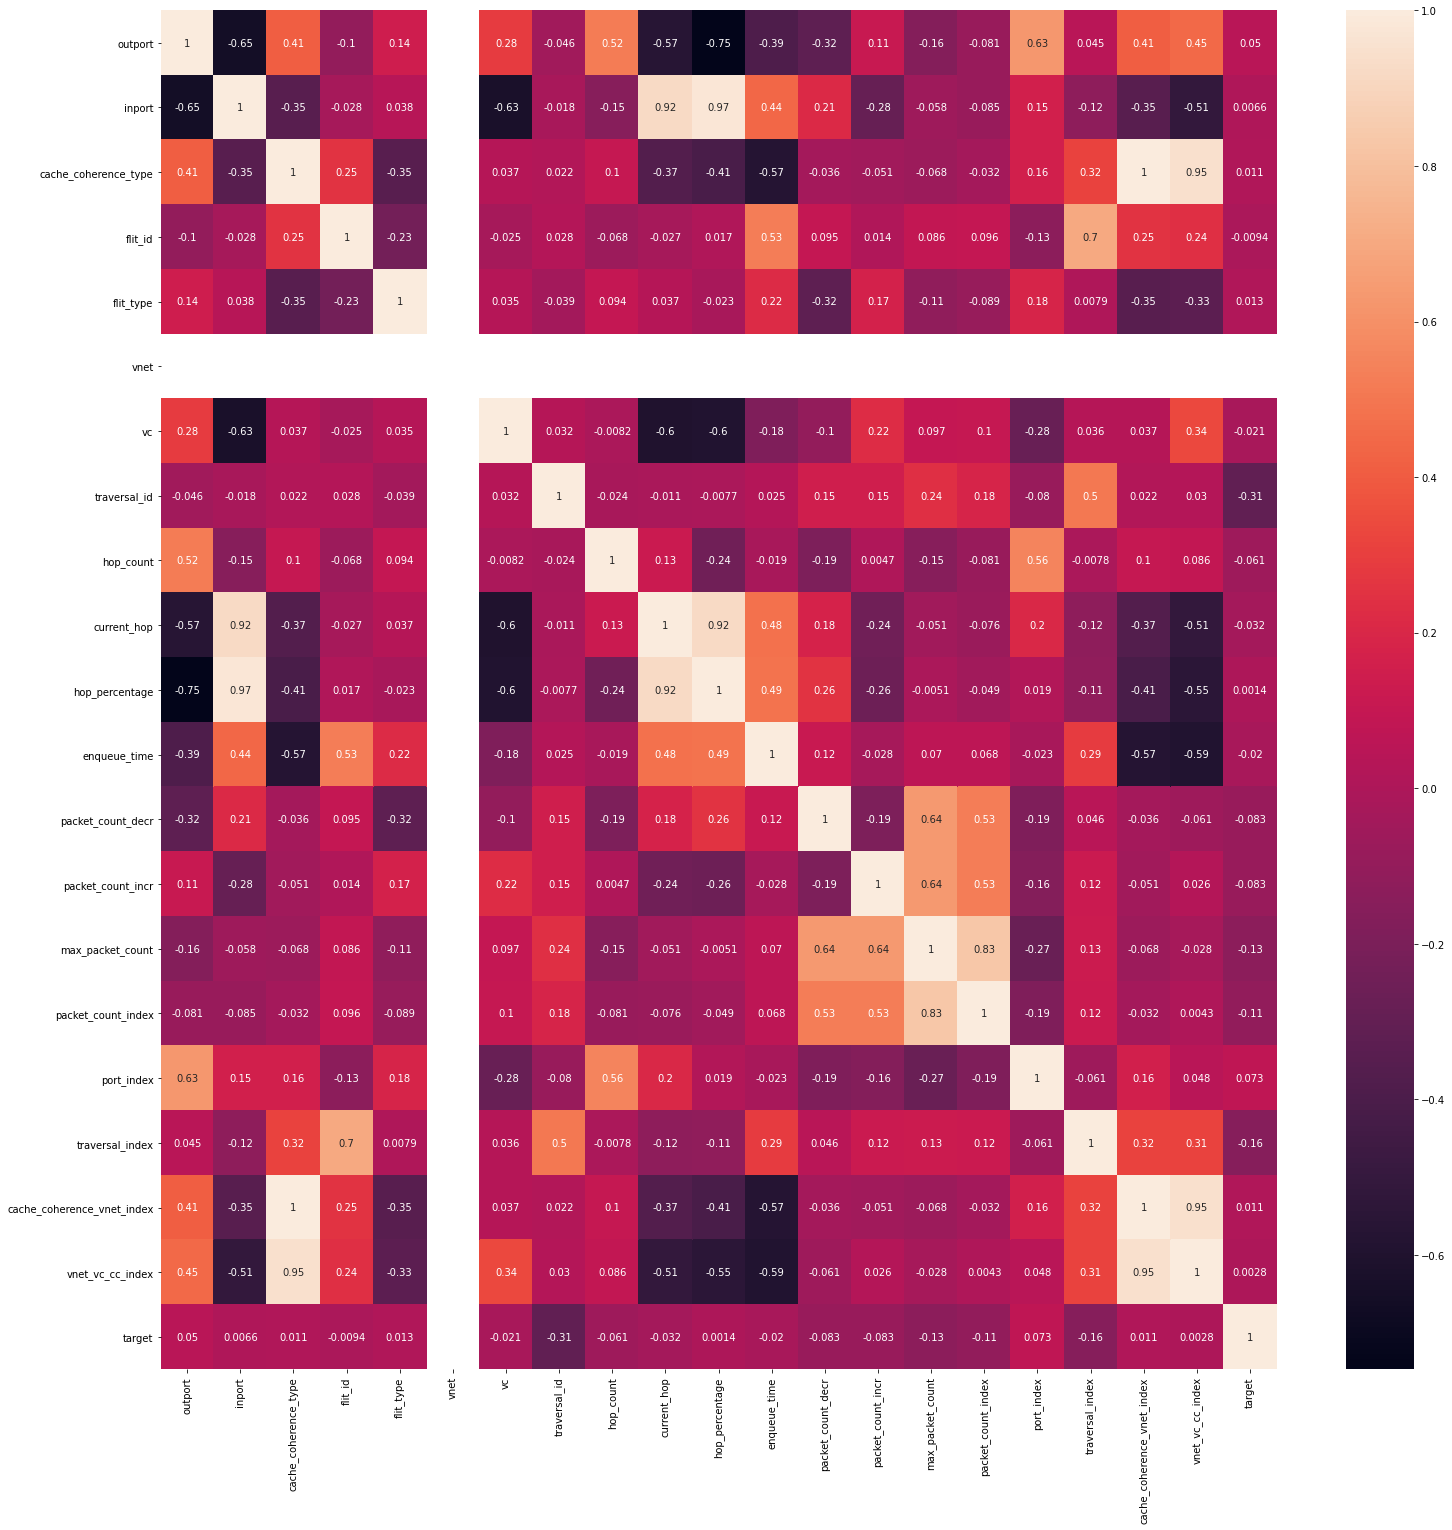

In [32]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [34]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['hop_percentage', 'inport', 'vnet_vc_cc_index', 'cache_coherence_type']

In [ ]:
#df = df.drop(columns=[''])

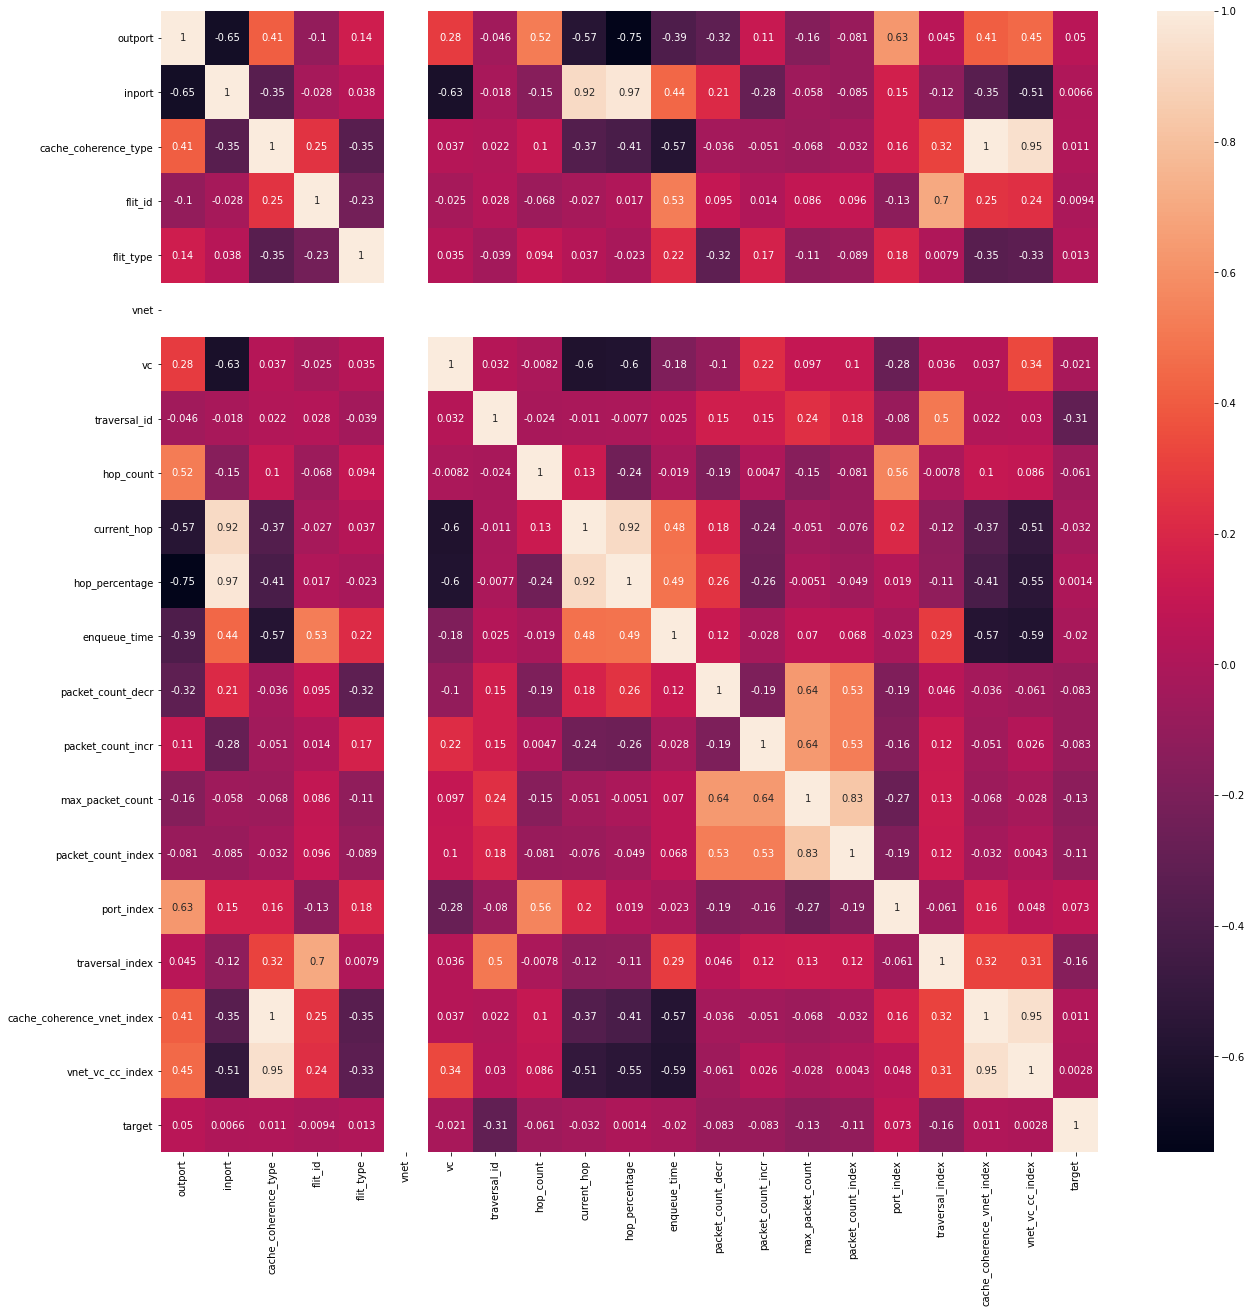

In [36]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

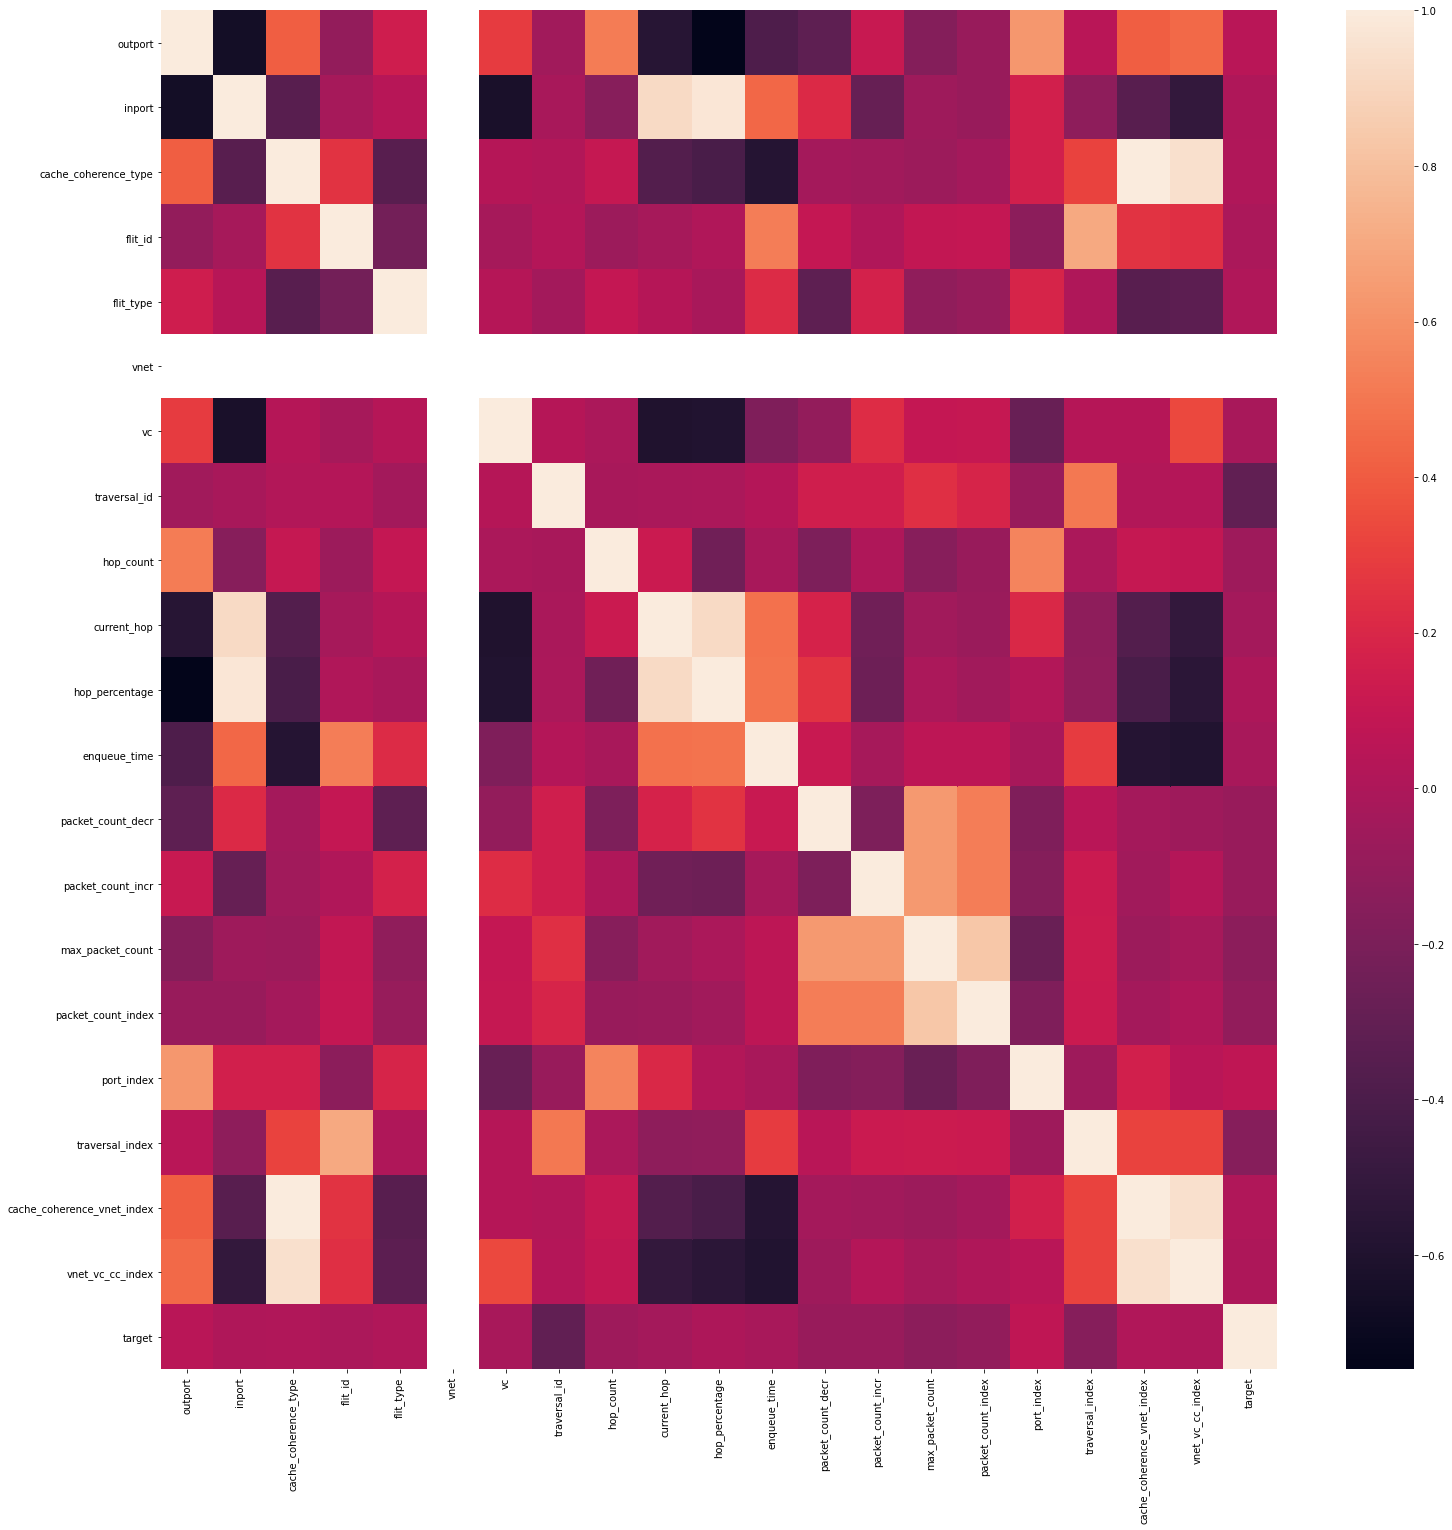

In [37]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [ ]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [39]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.50,0.6,0.75,0.214286,0.000000,0.000000,0.000000,0.000000,1.0,0.000001,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.6,0.75,0.214286,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
2,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.50,0.6,0.75,0.214286,0.000000,0.000000,0.000000,0.000000,1.0,0.000003,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000698,0.50,0.8,1.00,0.285714,0.070423,0.000000,0.070423,0.003757,0.0,0.000031,0.000000,0.000000
4,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.000698,0.50,0.0,0.00,0.000000,0.056338,0.014085,0.070423,0.006762,0.0,0.000066,0.166667,0.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154976,0.666667,0.000000,0.833333,0.75,0.333333,0.0,0.333333,0.999801,0.50,0.0,0.00,0.375000,0.056338,0.126761,0.183099,0.036814,0.0,0.533331,0.833333,0.680000
154977,0.666667,0.000000,0.833333,1.00,0.666667,0.0,0.333333,0.999801,0.50,0.0,0.00,0.500000,0.042254,0.140845,0.183099,0.032307,0.0,1.000000,0.833333,0.680000
154978,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.666667,0.999834,0.50,0.0,0.00,0.500000,0.028169,0.154930,0.183099,0.026296,0.0,0.088888,0.166667,0.173333
154979,0.666667,0.000000,1.000000,0.00,1.000000,0.0,1.000000,0.999801,0.25,0.0,0.00,0.017857,0.014085,0.169014,0.183099,0.018783,0.0,0.311108,1.000000,1.000000


In [40]:
train_X[train_X.duplicated()].shape

(2633, 20)

In [41]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.666667,0.000000,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.000000,0.00,0.000000,0.425197,0.000000,0.425197,0.012984,0.0,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000,0.000067,0.666667,0.500000,0.75,0.218182,0.417323,0.007874,0.425197,0.025727,1.0,0.000003,0.000000,0.000000
2,0.000000,1.000000,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.363636,0.409449,0.015748,0.425197,0.037990,0.0,0.000000,0.944444,1.000000
3,0.000000,1.000000,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.381818,0.401575,0.023622,0.425197,0.049772,0.0,0.000009,0.944444,1.000000
4,0.000000,1.000000,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.400000,0.393701,0.031496,0.425197,0.061072,0.0,0.000015,0.944444,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78022,0.666667,0.000000,0.833333,0.75,0.333333,0.0,0.125,0.999967,0.666667,0.000000,0.00,0.381818,0.031496,0.070866,0.102362,0.011782,0.0,0.533332,0.833333,0.488818
78023,0.666667,0.000000,0.833333,1.00,0.666667,0.0,0.125,0.999967,0.666667,0.000000,0.00,0.509091,0.023622,0.078740,0.102362,0.010339,0.0,1.000000,0.833333,0.488818
78024,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.250,1.000000,0.666667,0.000000,0.00,0.509091,0.015748,0.086614,0.102362,0.008415,0.0,0.088889,0.166667,0.124601
78025,0.666667,0.000000,1.000000,0.00,1.000000,0.0,0.375,0.999967,0.500000,0.000000,0.00,0.018182,0.007874,0.094488,0.102362,0.006011,0.0,0.311109,1.000000,0.718850


In [42]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [43]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [44]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [45]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [46]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [47]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [48]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [50]:
train_Y = df['target']
train_Y.value_counts()

0    113922
1     41059
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [ ]:
seed = 5
np.random.seed(seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  1670.307908
17             traversal_index   560.771550
16                  port_index   527.543881
14            max_packet_count   174.310471
15          packet_count_index   149.358157
0                      outport   111.084810
12           packet_count_decr    88.595360
13           packet_count_incr    85.727476
8                    hop_count    50.965225
9                  current_hop    41.054083
6                           vc    23.840048
11                enqueue_time     5.513484
4                    flit_type     5.136338
3                      flit_id     2.913734
1                       inport     1.519535
2         cache_coherence_type     1.442321
18  cache_coherence_vnet_index     1.442321


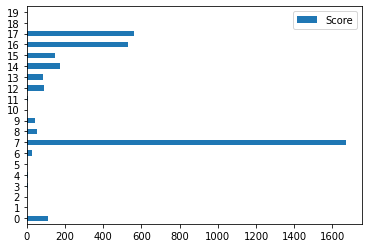

In [53]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [ ]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
pickle.dump(dt, open("dt-r12.pickle.dat", 'wb'))

In [ ]:
y_pred_dt= dt.predict(X_test)

In [58]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 93.60159375403278
Test Prediction Score 91.46369003451947


In [59]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 87.12368795416971
Test Prediction Score 82.88011614272153
Test Prediction Score 86.93551460380543
Test Prediction Score 82.11292456991619
Test Prediction Score 88.27968984561143
Test Prediction Score 81.21021611001964
Test Prediction Score 87.31562203032682
Test Prediction Score 83.049115913556


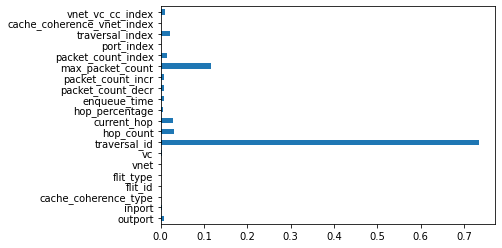

In [60]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

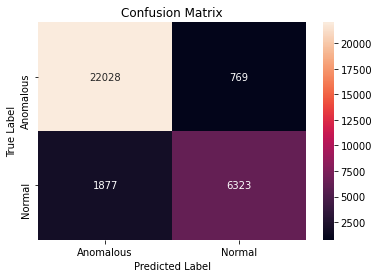

In [61]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     22797
           1       0.89      0.77      0.83      8200

    accuracy                           0.91     30997
   macro avg       0.91      0.87      0.89     30997
weighted avg       0.91      0.91      0.91     30997



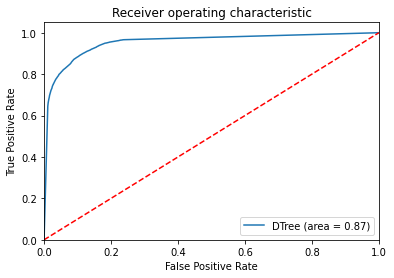

In [63]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [65]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pickle.dump(xgbc, open("xgbc-r12.pickle.dat", 'wb'))

In [ ]:
y_pred_xgbc= xgbc.predict(X_test)

In [68]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.89514776100143
Test Prediction Score 97.7223602284092


In [69]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.29867866251426
Test Prediction Score 84.60550561170362
Test Prediction Score 84.22571249693769
Test Prediction Score 83.09807381267461
Test Prediction Score 84.95227864314342
Test Prediction Score 84.37721021611002
Test Prediction Score 84.5349750030988
Test Prediction Score 84.19646365422396


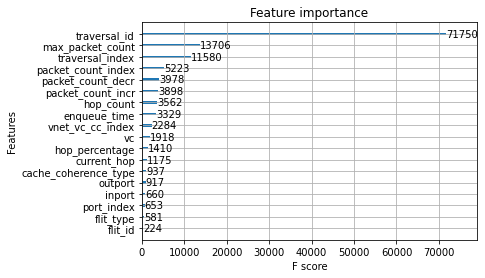

In [70]:
plot_importance(xgbc)
plt.show()

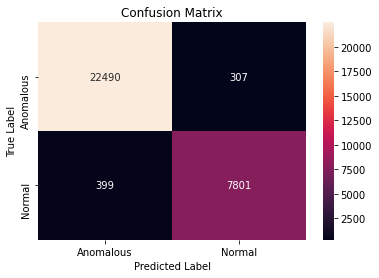

In [71]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [72]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     22797
           1       0.96      0.95      0.96      8200

    accuracy                           0.98     30997
   macro avg       0.97      0.97      0.97     30997
weighted avg       0.98      0.98      0.98     30997



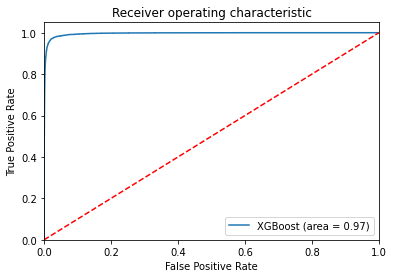

In [73]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()